# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

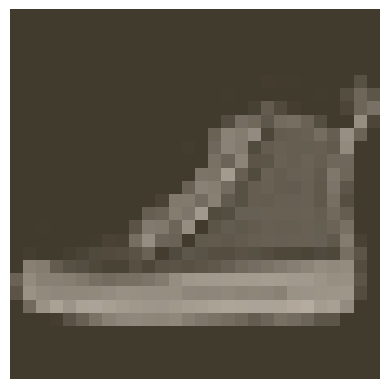

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
import torch.optim as optim

# Define the loss function (negative log likelihood)
criterion = nn.NLLLoss()

# Define the optimizer (SGD with learning rate 0.003 or use Adam)
# optimizer = optim.SGD(model.parameters(), lr=0.003)
# Alternatively, you can use Adam:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# TODO: Train the network here
epochs = 5  # Number of training epochs
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten the images from [batch_size, 1, 28, 28] to [batch_size, 784]
        images = images.view(images.shape[0], -1)

        # Clear the gradients (very important)
        optimizer.zero_grad()

        # Forward pass: get the logits from the model
        logits = model(images)

        # Compute the loss
        loss = criterion(logits, labels)

        # Backward pass: compute gradients
        loss.backward()

        # Update the weights
        optimizer.step()

        # Track the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f"Epoch {e+1}/{epochs}.. Training loss: {running_loss / len(trainloader)}")

Epoch 1/5.. Training loss: 0.516688837727377
Epoch 2/5.. Training loss: 0.38295810098555294
Epoch 3/5.. Training loss: 0.3433011734663551
Epoch 4/5.. Training loss: 0.3170779071478193
Epoch 5/5.. Training loss: 0.2981254643897639


tensor([[2.4224e-05, 1.6009e-08, 1.0090e-04, 2.0630e-06, 1.6620e-05, 9.9936e-01,
         2.5614e-04, 4.5205e-05, 1.9523e-04, 1.6257e-07]])


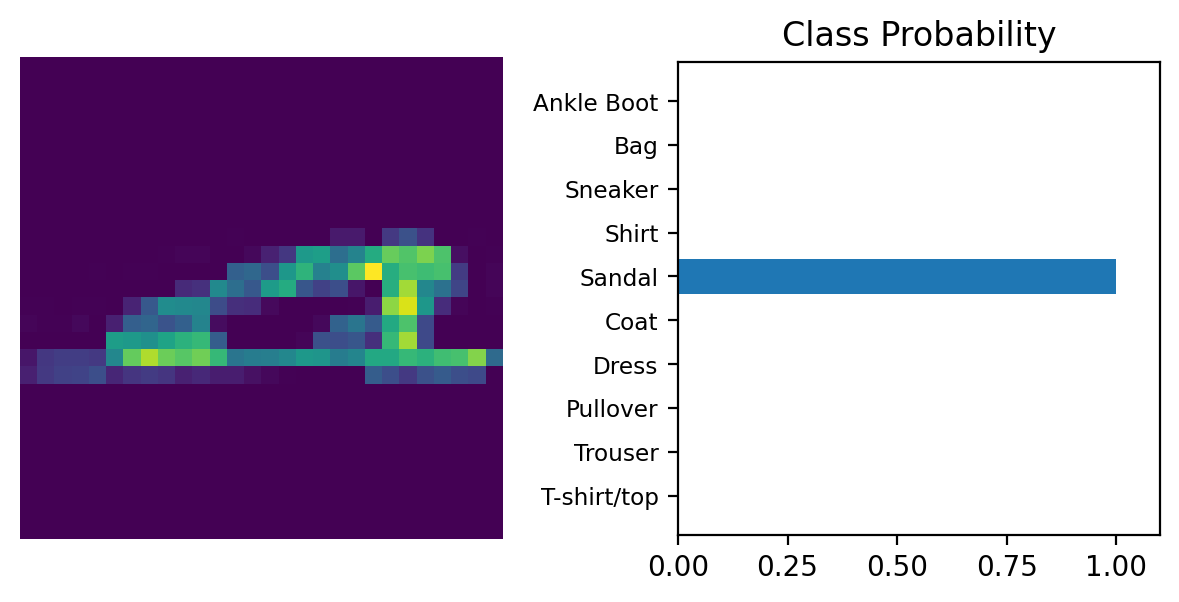

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")

In [36]:
testloader